<a href="https://colab.research.google.com/github/SachinScaler/UnsupervisedML_Feb24/blob/main/Anomaly_Detection_3_One_Class_SVM_and_LOF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!gdown 1c6cjIULb3-fjyaVITdui_AFcKMz_lxlg

Downloading...
From: https://drive.google.com/uc?id=1c6cjIULb3-fjyaVITdui_AFcKMz_lxlg
To: /content/AnomalyDetection.csv
100% 33.0k/33.0k [00:00<00:00, 56.9MB/s]


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,8)


df = pd.read_csv('/content/AnomalyDetection.csv')
df.head()

,Mileage,Price
0,54.282388,67.967708
1,17.331911,70.023637
2,36.548113,68.080455
3,42.567541,71.058755
4,5.608853,57.822432


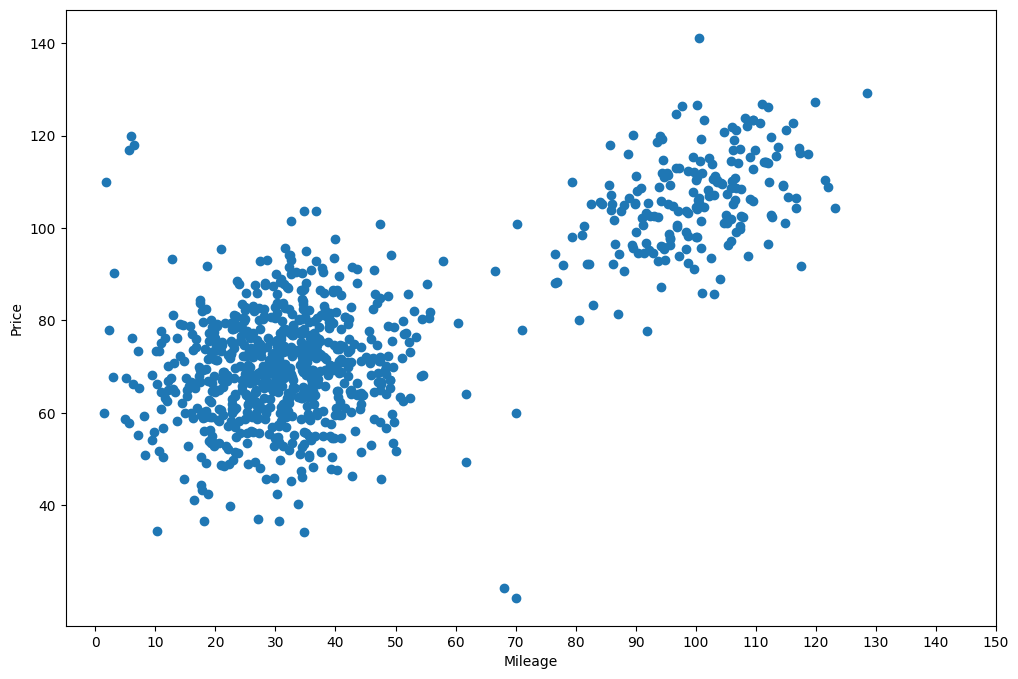

In [20]:
plt.scatter(df.Mileage, df.Price)
plt.yticks(np.arange(40,160,20))
plt.xticks(np.arange(0,160,10))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [25]:
from sklearn.svm import OneClassSVM

# create Model
oc_svm_model = OneClassSVM(kernel = 'rbf', gamma = 1)
oc_svm_model.fit(df)

# Train Model
ocsvm_preds = oc_svm_model.predict(df)

# predict
df['is_outlier_svm'] = ocsvm_preds

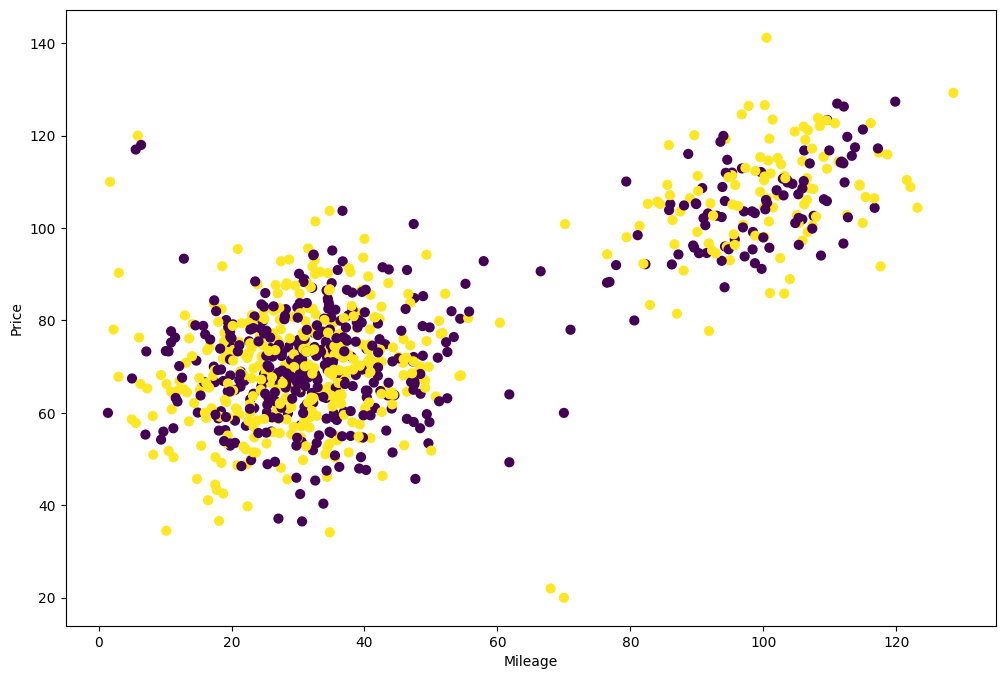

In [26]:
plt.scatter(df['Mileage'], df['Price'], s=40, c=df['is_outlier_svm'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [27]:
from sklearn.neighbors import LocalOutlierFactor

lof_model = LocalOutlierFactor(contamination=0.05)
lof_preds = lof_model.fit_predict(df)

df['is_outlier_lof'] = lof_preds

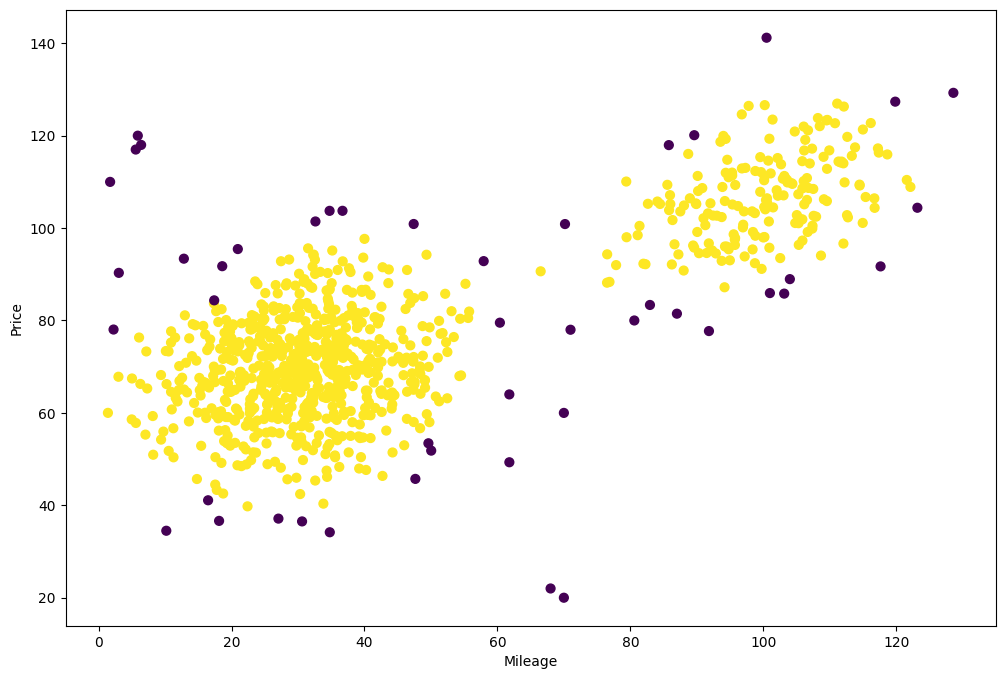

In [17]:
plt.scatter(df.Mileage, df.Price, s=40, c=df['is_outlier_lof'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [28]:
df.head()

,Mileage,Price,is_outlier_svm,is_outlier_lof
0,54.282388,67.967708,1,1
1,17.331911,70.023637,-1,1
2,36.548113,68.080455,-1,1
3,42.567541,71.058755,1,1
4,5.608853,57.822432,1,1
